# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [7]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

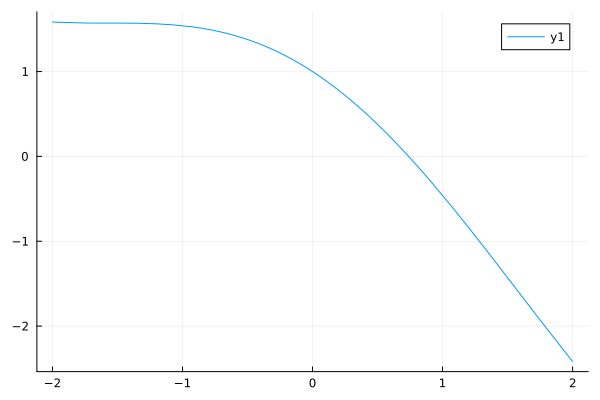

In [8]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [9]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [10]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [11]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [12]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [13]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [14]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [15]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [16]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [17]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [20]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

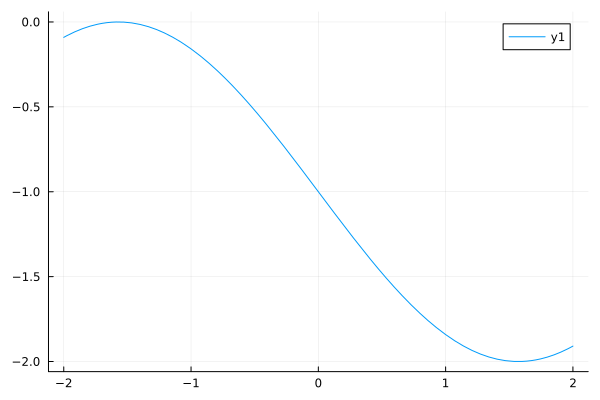

In [21]:
plot(D(f), -2,2)

In [22]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [23]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [24]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 0.68507389982090516, 0.9999969722835389 )
(a₅, b₅) = ( 0.73908449070788018, 0.739085775539707 )
(a₆, b₆) = ( 0.73908513321516056, 0.73908513321516078 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [25]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [26]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [27]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [28]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [29]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

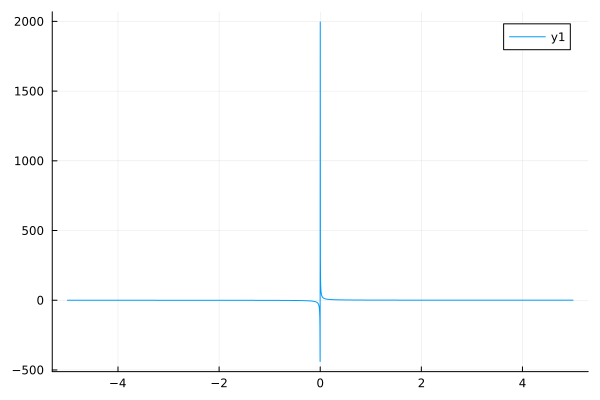

In [30]:
plot(x -> 1/x)

In [31]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [32]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

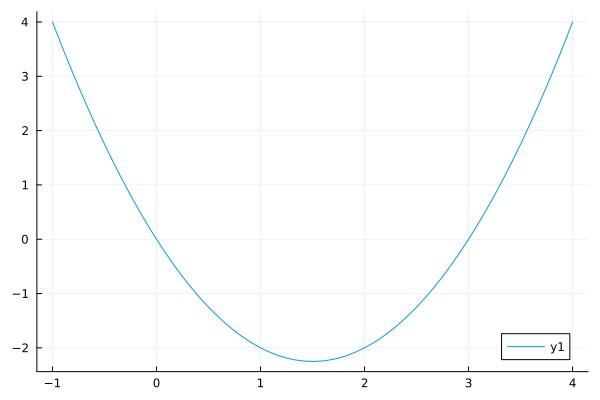

In [33]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.0.10/reference/

Wyciąganie informacji z przebiegu działania funkcji: https://docs.juliahub.com/Roots/o0Xsi/2.0.10/reference/#Tracking-iterations


tracker = Roots.Tracks()
find_zero(..., tracks = tracker)
 
iteracje ->  tracker.steps

wywołania funkcji ->  tracker.fncalls


### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [69]:
using DataFrames
using Roots
using ForwardDiff

# Sześć wybranych funkcji ze zbioru
a(x) = sin(x) - x/2 #1
b(x) = 2*x - exp(-x) #2
c(x) = x * exp(-x) #3
d(x) = (x + 3) * (x - 1)^2 #5
e(x) = x^3 #7
f(x) = 20.0 * x / ( 100.0 * x * x + 1.0 ) #10 the Repeller

# Tablica funkcji
functions = [a, b, c, d, e, f]

# Tablica przedziałów dla pierwszej metody
ranges = [(-3, -1), (0, 1), (-0.05, 5), (-4, -2), (-3, 1), (0, 1)]

# Tablica punktów startowych dla drugiej i trzeciej metody
points = [-2, 0.5, 0.5, -2.5, 0.5, 0.5]


# Struktura DataFrame
results = DataFrame(method_name = String[], function_name = String[], steps_count = Int[], fn_calls_count = Int[], result = Float64[], result_fn_value = Float64[], is_zero = Bool[])


# Testowanie
for i in 1:length(functions)

    fun = functions[i]

    # Metoda bisekcji
    tracker = Roots.Tracks()
    x = find_zero(fun, ranges[i], Bisection(), tracks = tracker)

    push!(results, ("Bisection", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))


    # Metoda Newtona

    # Definujemy D(f) obliczającą  funkcje pochodną 
    D(h) = x->ForwardDiff.derivative(h, float(x))

    tracker = Roots.Tracks()
    x = find_zero((fun, D(fun)), points[i], Roots.Newton(), tracks = tracker)

    push!(results, ("Newton", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))


    # Metoda siecznych
    tracker = Roots.Tracks()
    x = find_zero(fun, points[i], Order1(), tracks = tracker)

    push!(results, ("Secant", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))

end

# Tabelka wyników
print(results)


18×7 DataFrame
 Row │ method_name  function_name  steps_count  fn_calls_count  result        result_fn_value  is_zero 
     │ String       String         Int64        Int64           Float64       Float64          Bool    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Bisection    a                       51              54  -1.89549          0.0             true
   2 │ Newton       a                        4               8  -1.89549          0.0             true
   3 │ Secant       a                        5               7  -1.89549          0.0             true
   4 │ Bisection    b                       61              64   0.351734         0.0             true
   5 │ Newton       b                        4               8   0.351734         0.0             true
   6 │ Secant       b                        5               7   0.351734         0.0             true
   7 │ Bisection    c                        0         

2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

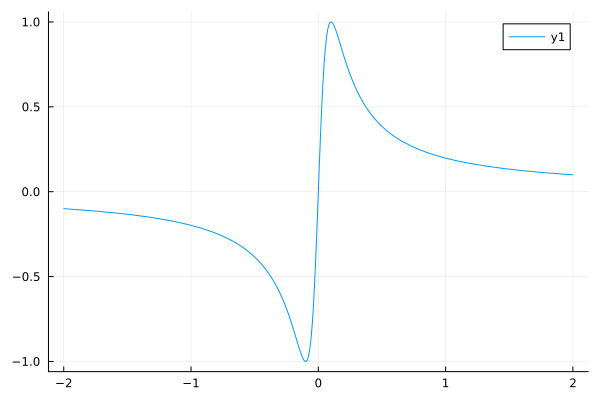

In [70]:
using Plots

Repeller(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )

plot(Repeller, -2, 2)

In [87]:
# Struktura DataFrame
results = DataFrame(method_name = String[], function_name = String[], steps_count = Int[], fn_calls_count = Int[], result = Float64[], result_fn_value = Float64[], is_zero = Bool[])

# Metoda bisekcji
tracker = Roots.Tracks()
x = find_zero(Repeller, (-1, 1), Bisection(), tracks = tracker)

push!(results, ("Bisection", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))


# Metoda Newtona

# Definujemy D(f) obliczającą  funkcje pochodną 
D(h) = x->ForwardDiff.derivative(h, float(x))

tracker = Roots.Tracks()
x = find_zero((Repeller, D(Repeller)), 0.5, Roots.Newton(), tracks = tracker)

push!(results, ("Newton", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))

# Metoda siecznych)
tracker = Roots.Tracks()
x = find_zero(Repeller, 0.5, Order1(), tracks = tracker)

push!(results, ("Secant", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))

Row,method_name,function_name,steps_count,fn_calls_count,result,result_fn_value,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,Bisection,Repeller,0,3,0.0,0.0,true
2,Newton,Repeller,25,50,1.76921e7,1.13045e-8,false
3,Secant,Repeller,36,38,2.05941e7,9.71154e-9,false


3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

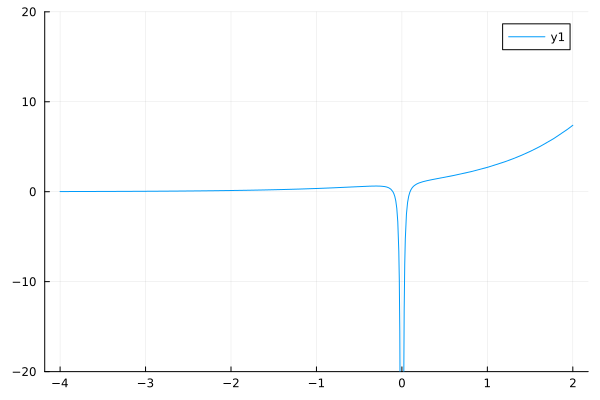

In [72]:
using Plots

fun1(x) = exp( x ) - 1 / ( 10 * x )^2

plot(fun1, -4, 2, ylim=(-20,20))

In [73]:
# Metoda bisekcji
find_zero(fun1, (-1, 1))

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



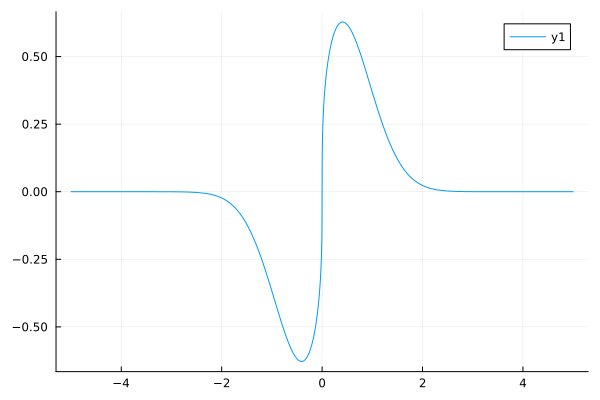

In [76]:
using Plots

# a pathological function for Newton's method
function fun2(x)
    if x < 0.0
        fx = -abs(x)^(1.0/3.0)*exp(-x^2)
    elseif x == 0.0
        fx = 0.0
    else
        fx = abs(x)^(1.0/3.0)*exp(-x^2)
    end
    return fx
end
plot(fun2)

In [88]:
# Metoda Newtona

D(h) = x->ForwardDiff.derivative(h, float(x))

find_zero((fun2, D(fun2)), 0, Roots.Newton())

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Algorithm failed to converge")

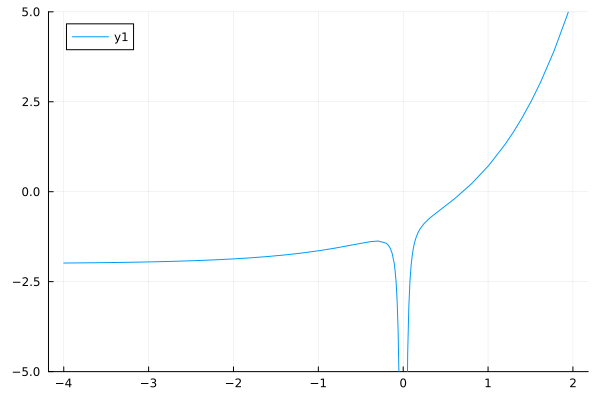

In [83]:
using Plots

fun3(x) = exp( x ) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3

plot(fun3, -4, 2, ylim=(-5,5))

In [85]:
# Metoda siecznych
x_fun3 = find_zero(fun3, 0, Order1(), tracks = tracker)

0.0

In [86]:
fun3(x_fun3)

NaN